We need to create an instance of QuantumCircuit class. The way to this is to use the QuantumCircuit module from qiskit.circuit

In [1]:
from qiskit.circuit import QuantumCircuit

QuantumCircuit(num_qubits) will create an instance of QuantumCircuit with _num_qubits_ qubits. For example the following creates an instance called _qc_ with 1 qubit.

In [2]:
qc = QuantumCircuit(1)

Circuits can be visualized by calling the .draw() method on them. By default this is in ASCII. We can use the matplotlib backend. Note: when calling this for the first time, you might get a 'pylatexenc' not found error. Install it inside Jupyter by with _%pip install pylatexenc_

Gates are applied as circuit methods with the index of the qubits passed as arguments. Indexing starts from 0. For example: the following applies Hadamard to the only qubit in the circuit _qc_.

In [5]:
qc.h(0)

The following gives an ASCII circuit diagram

In [7]:
qc.draw()

┌───┐
q: ┤ H ├
   └───┘

Compare with the matplotlib backend

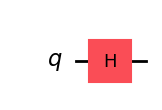

In [8]:
qc.draw('mpl')

We can go from circuits to statevectors with the Statevector class from qiskit.quantum_info module

In [10]:
from qiskit.quantum_info import Statevector

In [11]:
state = Statevector.from_instruction(qc)

In [12]:
state

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


Note that qiskit follows little-endean naming convention meaning that $q_0$ is the rightmost bit $q_N \cdots q_0$

For gates with parameters, e.g. the $R_z(\theta)$ gate which rotates about the $z$-axis by $\theta$, the argument is passed onto the method. The following rotates by $\pi$ around $z$.

In [14]:
import numpy as np

In [15]:
qc.rz(np.pi, 0)

In [20]:
state2 = Statevector.from_instruction(qc)

In [21]:
state2

Statevector([4.32978028e-17-0.70710678j, 4.32978028e-17+0.70710678j],
            dims=(2,))


## Bell state

CNOT requires the indices of the control and the target qubit. The following creates the Bell pair.

In [22]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

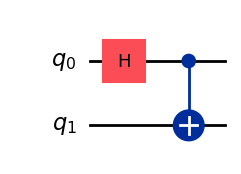

In [23]:
qc.draw('mpl')

In [24]:
bell_pair = Statevector.from_instruction(qc)

The basis is [$\ket{00}, \ket{01}, \ket{10}, \ket{11}$]

In [25]:
bell_pair

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


## Measurements

This is all at the statevector level so far. In an actual circuit, we access the state with measurements. For that we have to append classical registers into our circuit. The ClassicalRegister class from qiskit.circuit will help us with that.

In [27]:
from qiskit.circuit import QuantumRegister, ClassicalRegister

In [28]:
qreg = QuantumRegister(2, 'q')
creg = ClassicalRegister(2, 'c')

q is the label for the quantum register $\{q_0, q_1, \cdots, q_{N-1}\}$. Likewise _c_ is the label for the classical register $\{c_0, c_1, \cdots, c_{N-1}\}$. We can pass _qreg_ and _creg_ to instantiate a circuit with these registers.

In [35]:
qc = QuantumCircuit(qreg, creg)

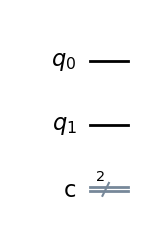

In [36]:
qc.draw('mpl') # does nothing yet

In [37]:
# this creates the Bell pair again
qc.h(0)
qc.cx(0, 1)

At the end we have to append the measurement to the circuit

In [38]:
qc.measure(qreg, creg)

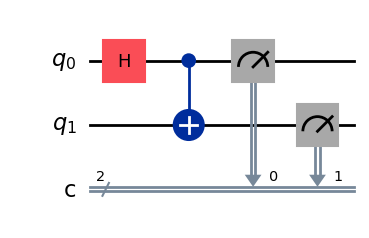

In [39]:
qc.draw('mpl')

To find the outcomes of measurements, we will use the StatevectorSampler class from qiskit.primitives

In [46]:
from qiskit.primitives import StatevectorSampler

In [47]:
sampler = StatevectorSampler()

In [48]:
num_shots = 100

In [63]:
job = sampler.run([(qc, [])], shots = num_shots)

In [64]:
job.result()[0].data.c.get_counts()

{'11': 49, '00': 51}